In [226]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [227]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [228]:
bos = pd.DataFrame(boston.data)


In [229]:
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


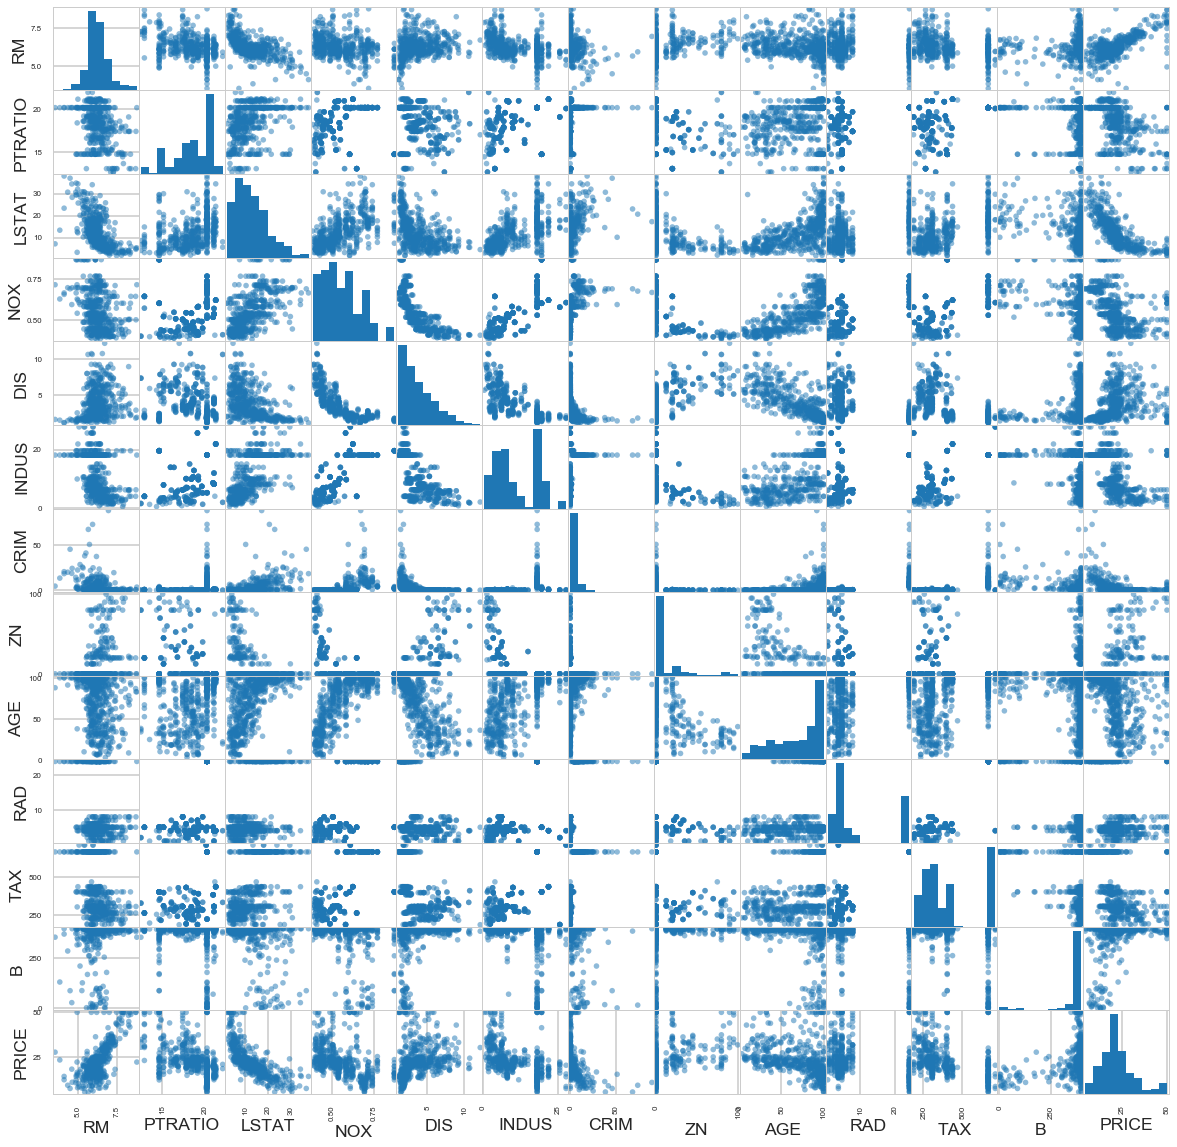

In [230]:
#other predictor variables
pd.tools.plotting.scatter_matrix(bos.loc[:, ["RM","PTRATIO","LSTAT","NOX","DIS","INDUS","CRIM","ZN","AGE","RAD","TAX","B","PRICE"]], diagonal="hist",figsize=(20,20))

plt.figure(figsize=(50,50))
plt.show()

In [231]:
X = bos.drop("PRICE",axis=1)
y = bos.PRICE

In [232]:
X_mod = X
X_mod.LSTAT = np.log(X.LSTAT)
X_mod.DIS = np.log(X.DIS)
X_mod.CRIM = np.log(X.CRIM)

## Linear Regression

In [233]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [234]:
lr.intercept_

58.604330985975963

In [235]:
lr.coef_

array([  1.31299578e-02,   6.80962559e-03,  -5.52095607e-03,
         2.41643950e+00,  -1.92701666e+01,   2.73690436e+00,
         1.40059262e-02,  -5.84365246e+00,   2.28849701e-01,
        -1.23401540e-02,  -8.35503497e-01,   8.93679322e-03,
        -9.14781879e+00])

In [236]:
lr.score(X,y)

0.79137433567597926

In [237]:
lr2 = LinearRegression(normalize=True)
lr2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [238]:
lr2.intercept_

58.604330985977242

In [239]:
lr2.coef_

array([  1.31299578e-02,   6.80962559e-03,  -5.52095607e-03,
         2.41643950e+00,  -1.92701666e+01,   2.73690436e+00,
         1.40059262e-02,  -5.84365246e+00,   2.28849701e-01,
        -1.23401540e-02,  -8.35503497e-01,   8.93679322e-03,
        -9.14781879e+00])

In [240]:
lr2.score(X,y)

0.79137433567597926

In [241]:
# improved with X_mod i.e. log features
lr.fit(X_mod,y)
lr.score(X_mod,y)

0.79137433567597926

In [242]:
# reduced feature set after doing Lasso
X_mod2 = X_mod
X_mod2 = X_mod2.drop("CRIM",axis=1)
X_mod2 = X_mod2.drop("AGE",axis=1)

lr.fit(X_mod2,y)
lr.score(X_mod2,y)

0.79082040417043098

#### <font color='red'>why lr2 results above are same as lr? normalize=True/False has no effect?</font>

## Ridge Regression

In [243]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas=[.0003,.001,.003,.01,.03,.1,.3,1,3,10,30,100,300,1000],cv=5,normalize=True)

In [244]:
ridge.fit(X,y)

RidgeCV(alphas=[0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000],
    cv=5, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=False)

In [245]:
ridge.alpha_

0.1

In [246]:
ridge.score(X,y)

0.78078198802893517

In [247]:
ridge.intercept_

43.099959006888724

In [248]:
ridge.coef_

array([  4.40409603e-02,   3.66324066e-03,  -5.25906883e-02,
         2.67466396e+00,  -1.13965029e+01,   3.27019194e+00,
         4.31417171e-03,  -3.94908526e+00,   8.42045996e-02,
        -5.82722253e-03,  -7.39744968e-01,   9.09028485e-03,
        -7.60161286e+00])

In [249]:
# improved with X_mod i.e. log features
ridge.fit(X_mod,y)
ridge.score(X_mod,y)

0.78078198802893517

## Lasso Regression

In [250]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(alphas=[.0003,.001,.003,.01,.03,.1,.3,1,3,10,30,100,300,1000],cv=5,normalize=True,random_state=42)

In [251]:
lasso.fit(X_mod,y)

LassoCV(alphas=[0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000],
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=42, selection='cyclic', tol=0.0001,
    verbose=False)

In [252]:
lasso.score(X_mod,y)

0.78894527749723198

In [253]:
lasso.coef_

array([  0.00000000e+00,   0.00000000e+00,  -1.45120623e-02,
         2.33816935e+00,  -1.52796405e+01,   2.88113615e+00,
         5.72120629e-03,  -5.12263939e+00,   1.28093861e-01,
        -7.40143973e-03,  -7.82376394e-01,   8.12775683e-03,
        -9.00507510e+00])

In [254]:
lasso.alpha_

0.0030000000000000001

In [255]:
X_mod.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-5.064036,18.0,2.31,0.0,0.538,6.575,65.2,1.408545,1.0,296.0,15.3,396.90,1.605430
1,-3.600502,0.0,7.07,0.0,0.469,6.421,78.9,1.602836,2.0,242.0,17.8,396.90,2.212660
2,-3.601235,0.0,7.07,0.0,0.469,7.185,61.1,1.602836,2.0,242.0,17.8,392.83,1.393766
3,-3.430523,0.0,2.18,0.0,0.458,6.998,45.8,1.802073,3.0,222.0,18.7,394.63,1.078410
4,-2.672924,0.0,2.18,0.0,0.458,7.147,54.2,1.802073,3.0,222.0,18.7,396.90,1.673351


## OLS

In [258]:
# we will use X_mod2
X_mod2.head()

,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,18.0,2.31,0.0,0.538,6.575,1.408545,1.0,296.0,15.3,396.90,1.605430
1,0.0,7.07,0.0,0.469,6.421,1.602836,2.0,242.0,17.8,396.90,2.212660
2,0.0,7.07,0.0,0.469,7.185,1.602836,2.0,242.0,17.8,392.83,1.393766
3,0.0,2.18,0.0,0.458,6.998,1.802073,3.0,222.0,18.7,394.63,1.078410
4,0.0,2.18,0.0,0.458,7.147,1.802073,3.0,222.0,18.7,396.90,1.673351


In [277]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

ols_m = ols('PRICE ~ ZN + INDUS + CHAS + NOX + RM + np.log(DIS) + RAD + TAX + PTRATIO + B + np.log(LSTAT)',bos).fit()


In [280]:
ols_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     169.8
Date:                Sat, 21 Apr 2018   Prob (F-statistic):          6.05e-160
Time:                        17:17:34   Log-Likelihood:                -1444.4
No. Observations:                 506   AIC:                             2913.
Df Residuals:                     494   BIC:                             2964.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        58.0269      4.966     11.686      0.000      48.271      67.783
ZN                0.0051      0.011      0.444      0.657      -0.017       0.028
INDUS            -0.0067      0.055     -0.120      0.904      -0.116       0.102
CHAS              2.4746      0.771      3.209      0.001       0.960       3.990
NOX             -18.5000      3.481     -5.314      0.000     -25.340     -11.660
RM                2.8545      0.376      7.585      0.000       2.115       3.594
np.log(DIS)      -6.1863      0.712     -8.683      0.000      -7.586      -4.786
RAD               0.2266      0.057      3.974      0.000       0.115       0.339
TAX              -0.0123      0.003     -3.659      0.000      -0.019      -0.006
PTRATIO          -0.8272      0.117     -7.054      0.000      -1.058      -0.597
B                 0.0091      0.002      3.815      0.000       0.004       0.014
np.log(LSTAT)    -8.8913      0.529    -16.823      0.000      -9.930      -7.853
==============================================================================
Omnibus:                       97.294   Durbin-Watson:                   1.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              365.223
Skew:                           0.830   Prob(JB):                     4.93e-80
Kurtosis:                       6.817   Cond. No.                     1.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [282]:
m_ols2 = ols('PRICE ~ CHAS + NOX + RM + np.log(DIS) + RAD + TAX + PTRATIO + B + np.log(LSTAT)',bos).fit()

In [283]:
m_ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     208.2
Date:                Sat, 21 Apr 2018   Prob (F-statistic):          3.26e-162
Time:                        17:17:59   Log-Likelihood:                -1444.5
No. Observations:                 506   AIC:                             2909.
Df Residuals:                     496   BIC:                             2951.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        58.3669      4.906     11.897      0.000      48.728      68.006
CHAS              2.4547      0.765      3.209      0.001       0.952       3.958
NOX             -18.7939      3.361     -5.592      0.000     -25.397     -12.191
RM                2.8626      0.374      7.651      0.000       2.127       3.598
np.log(DIS)      -6.0538      0.645     -9.379      0.000      -7.322      -4.786
RAD               0.2274      0.054      4.183      0.000       0.121       0.334
TAX              -0.0122      0.003     -4.097      0.000      -0.018      -0.006
PTRATIO          -0.8477      0.109     -7.779      0.000      -1.062      -0.634
B                 0.0091      0.002      3.819      0.000       0.004       0.014
np.log(LSTAT)    -8.9248      0.523    -17.069      0.000      -9.952      -7.898
==============================================================================
Omnibus:                       98.397   Durbin-Watson:                   1.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              369.166
Skew:                           0.840   Prob(JB):                     6.87e-81
Kurtosis:                       6.833   Cond. No.                     1.57e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [289]:
JB, JBpv,skw,kurt = sm.stats.stattools.jarque_bera(m_ols2.resid)
print(JB,JBpv,skw,kurt)

369.16550416289556 6.86640343078e-81 0.8398210700834743 6.832574665336803


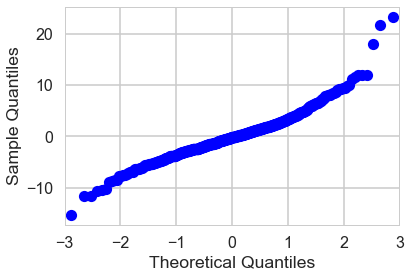

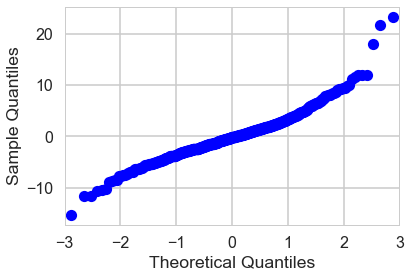

In [287]:
#qqpolot vs. normal distribution
sm.qqplot(m_ols2.resid)

In [290]:
#object for the analysis of influential points
infl = m_ols2.get_influence()
#members
print(dir(infl))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_get_drop_vari', '_ols_xnoti', '_res_looo', 'aux_regression_endog', 'aux_regression_exog', 'cooks_distance', 'cov_ratio', 'det_cov_params_not_obsi', 'dfbetas', 'dffits', 'dffits_internal', 'endog', 'ess_press', 'exog', 'get_resid_studentized_external', 'hat_diag_factor', 'hat_matrix_diag', 'influence', 'k_vars', 'model_class', 'nobs', 'params_not_obsi', 'resid_press', 'resid_std', 'resid_studentized_external', 'resid_studentized_internal', 'resid_var', 'results', 'sigma2_not_obsi', 'sigma_est', 'summary_frame', 'summary_table']


In [291]:
#Other criteria for detecting influential points
print(infl.summary_frame().filter(["hat_diag","student_resid","dffits","cooks_d"]))

     hat_diag  student_resid    dffits       cooks_d
0    0.011032      -1.773185 -0.187278  3.492222e-03
1    0.004452      -0.683598 -0.045712  2.091804e-04
2    0.009094       0.175932  0.016854  2.846205e-05
3    0.017714      -0.370505 -0.049754  2.479760e-04
4    0.009995       1.446229  0.145318  2.107100e-03
5    0.009925       0.112752  0.011289  1.276947e-05
6    0.012987       0.474214  0.054395  2.963452e-04
7    0.021510       2.392427  0.354714  1.246349e-02
8    0.031700       1.235618  0.223567  4.992899e-03
9    0.020578       0.471410  0.068331  4.676508e-04
10   0.026063      -0.398553 -0.065198  4.258033e-04
11   0.015766      -0.173837 -0.022002  4.850287e-05
12   0.015495       0.752113  0.094357  8.911050e-04
13   0.013987       0.088341  0.010522  1.109259e-05
14   0.011210      -0.114564 -0.012199  1.491016e-05
15   0.013787       0.038592  0.004563  2.086293e-06
16   0.017165       0.213591  0.028227  7.983002e-05
17   0.010811       0.465256  0.048639  2.3695

(array([  21.,   55.,   82.,  154.,   84.,   41.,   30.,    8.,   10.,   21.]),
 array([  5. ,   9.5,  14. ,  18.5,  23. ,  27.5,  32. ,  36.5,  41. ,
         45.5,  50. ]),
 <a list of 10 Patch objects>)

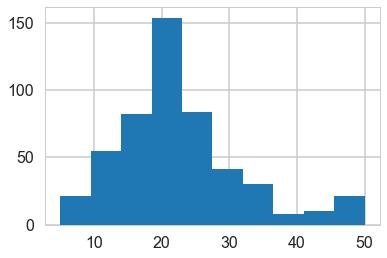

In [295]:
plt.hist(bos.PRICE)